1 (15pts)
Using the college.csv dataset in BlackBoard electronic reserves or attached to this assignment, create 2 subplots within a figure with matplotlib.

You can select any one of these plots which are the ones to know for the purposes of this course…

•	Scatter

•	Bar

•	Plot (aka line)

•	Box

•	Histogram

•	Pie

You can choose any other chart type you are interested in learning more about, but these are the common ones that you should know what they attempt to convey,

Include a Title and labels of axis or feature shown if axis are not present, and a legend.  Ensure the plot is sized to be seen clearly.

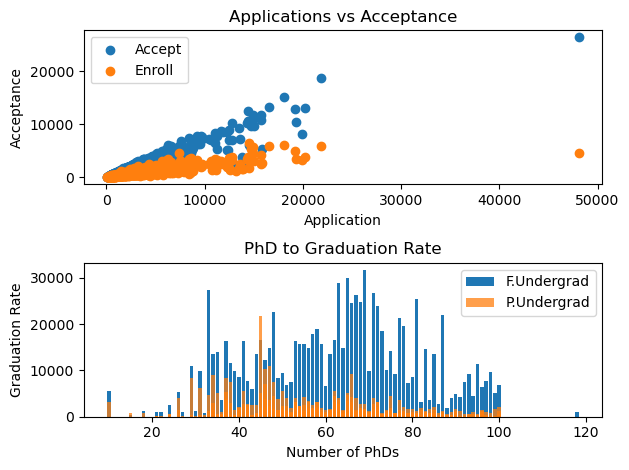

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

data = pd.read_csv("College.csv")
fig1 = plt.figure()

ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)

ax1.scatter(data["Apps"], data["Accept"])
ax1.scatter(data["Apps"], data["Enroll"])
ax1.set_title("Applications vs Acceptance")
ax1.set_xlabel("Application")
ax1.set_ylabel("Acceptance")
ax1.legend(["Accept","Enroll"])

ax2.bar(data["Grad.Rate"], data["F.Undergrad"]) 
ax2.bar(data["Grad.Rate"], data["P.Undergrad"], alpha=0.75)
ax2.set_title("PhD to Graduation Rate")
ax2.set_xlabel("Number of PhDs")
ax2.set_ylabel("Graduation Rate")
ax2.legend(["F.Undergrad","P.Undergrad"])

fig1.tight_layout()

---
2 (10pts)
Describe the null hypotheses to which the p-values given in Table 3.4 correspond. 

Explain what conclusions you can draw based on these p-values. 

Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.




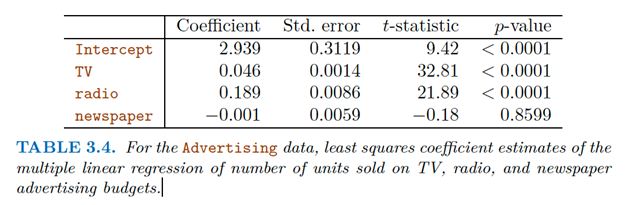

The null hypothesis is that X and Y have no relationship. The p-value is a measure that indicates that:

    p-value=0: Not chance, null hypothesis reject
    p-value=1: Chance, null hypothesis accept

So for the p-values that are <0.0001, the null hypothesis is rejected. For the newspaper p-value of 0.8599, the null hypothesis is likely.

The table shows sales from the advertising of each respective item. It can be seen that advertising for the TV and radio have a relationship to sales, while newspapers do not.

---

3. (15pts)
Again, using the college.csv dataset:

    Perform a basic Exploratory Data Analysis. -> Should have used pd.df.info()

Provide mean, standard deviation, information on quartiles for all numerical features -> Should have used pd.df.describe()

Identify any categorical features.

Are there any missing data?  If yes, how many and for which features?

Create one chart that explores the distribution of the data feature Top10perc. 



Apps
Mean: 3001.6383526383524
Standard Deviation: 3867.710205461697
Quartile:
	0:	81.0
	0.25:	776.0
	0.5:	1558.0
	1:	48094.0

Accept
Mean: 2018.8043758043757
Standard Deviation: 2449.5361697535027
Quartile:
	0:	72.0
	0.25:	604.0
	0.5:	1110.0
	1:	26330.0

Enroll
Mean: 779.972972972973
Standard Deviation: 928.5780721499816
Quartile:
	0:	35.0
	0.25:	242.0
	0.5:	434.0
	1:	6392.0

Top10perc
Mean: 27.55855855855856
Standard Deviation: 17.629009144889917
Quartile:
	0:	1.0
	0.25:	15.0
	0.5:	23.0
	1:	96.0

Top25perc
Mean: 55.7966537966538
Standard Deviation: 19.792029104853043
Quartile:
	0:	9.0
	0.25:	41.0
	0.5:	54.0
	1:	100.0

F.Undergrad
Mean: 3699.907335907336
Standard Deviation: 4847.298277244958
Quartile:
	0:	139.0
	0.25:	992.0
	0.5:	1707.0
	1:	31643.0

P.Undergrad
Mean: 855.2985842985843
Standard Deviation: 1521.4518859790956
Quartile:
	0:	1.0
	0.25:	95.0
	0.5:	353.0
	1:	21836.0

Outstate
Mean: 10440.66924066924
Standard Deviation: 4020.4268369275524
Quartile:
	0:	2340.0
	0.25:	7320.0
	0

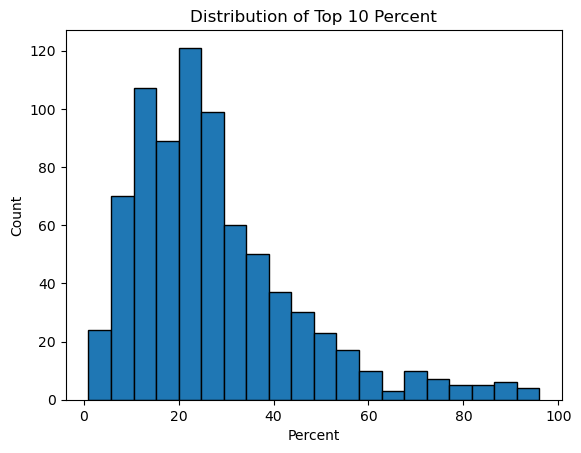

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("College.csv")
numerical_data = data.iloc[:,2:]

for column in numerical_data.keys():
    column_data = numerical_data[column]
    
    print(f"\n{column}")
    print(f"Mean: {np.mean(column_data)}")
    print(f"Standard Deviation: {np.std(column_data)}")
    print("Quartile:")
    for i in [0, 0.25, 0.5, 1]:
        print(f"\t{i}:\t{column_data.quantile(i)}")

print("The first 2 columns are categorical: School name and if the school is private (Yes/No)")
missing_data = pd.isnull(data).sum()
print(missing_data)
print("No missing data")

plt.hist(data["Top10perc"], bins=20, edgecolor="black")
plt.title("Distribution of Top 10 Percent")
plt.xlabel("Percent")
plt.ylabel("Count")
plt.show()

In [37]:
from sklearn import * #<- Not importing specific bits so I can try to learn/memorize where each part comes from

X = numerical_data[["Top10perc"]]
y = numerical_data["Grad.Rate"]

# split and train
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# Make linear regression model and fit it
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

#*****
 # model.summary() will tell you information on it
#*****

# predict on test set with Linear regression model
y_pred = model.predict(X_test)

# calculate test values
coefficent = model.coef_
intercept = model.intercept_
r2 = sklearn.metrics.r2_score(y_test, y_pred)
rmse = sklearn.metrics.root_mean_squared_error(y_test, y_pred)

# print values
print(f"Coefficients: {coefficent}")
print(f"Intercept: {intercept:}")
print(f"R2: {r2:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

print(f"Max value in y: {y.max()}")

Coefficients: [0.47957069]
Intercept: 51.87436056372566
R2: 0.272
Root Mean Squared Error: 14.567
Max value in y: 118


From looking at the coefficents, R2 and RMSE, it appears that the model fit is not great. 


The coefficent shows the slope of the linear regression model to be mostly flat. Looking at the R-squared value and RMSE supports the idea that there is not a great fit between the model and the data. The R2 value of 0.178 shows that the fitting is leaning towards not explaining the variance in the data. The RMSE shows that there are large errors. Since y (graduation rate) should ranges from 0 to 100, having an RMSE of 15.574 to explain the majority of the data is a large spread.


However, I did notice that in the lowest value for the graduation rate data is 10, which is fine, but the max was 118. This data point does not really make sense in my opinion. If the graduation rate is a percentage of students enrolled, how can it be more than 100%? There could be a case made to generate a new model with row for Cazenovia College removed (college with supposed 118% grad rate) to get a better fit.

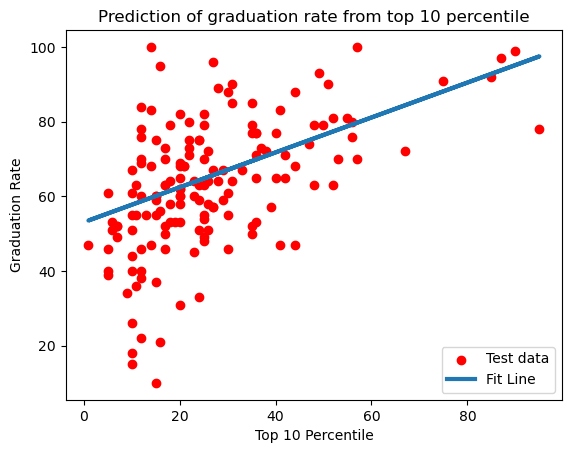

In [28]:
# visualize the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label="Test data", color="red")
plt.plot(X_test, y_pred, label="Fit Line", linewidth=3)
plt.title("Prediction of graduation rate from top 10 percentile")
plt.xlabel("Top 10 Percentile")
plt.ylabel("Graduation Rate")
plt.legend()
plt.show()

---

5. (10pts)
Explain the concept of over and under-fitting. Explain how you might arrive at each.  Include detail on the concept of generalization.



In data analytics, fitting usually refers to a model's capability to predict data. In a 2-D example, the model would be a line with possibly some curve to it. Before the model is generated to make a fit, data is given. This data is seperated into training and test data. The training data is what is used to make a model and have a fit. 

For over-fitting, the model is tailored heavily to fit the training data to ensure the residuals are as low as possible It generates a complex model. Underfitting creates a simple model to ensure the model can fit a wider range of data, not just the test data. There are problems for both, overfitting causes the model to follow the training data so closely that when the test data is used, the model does not properly represent the data. In underfitting, large outliers or erratic data can cause issues with the model, making the model not fit a larger data set.

To arrive at overfitting, the model should try to follow the test data as much as possible to reduce errors. To arrive at underfitting, the model should try to get a line of best fit that projects how the data looks and how it could look. Generalization usually ties closer to underfitting than overfitting. Generalization is the model's ability to accurately predict outcomes for new data and should be used to ensure both underfitting and overfitting do not happen.

INFO FROM THE HW OVERVIEW:
Overfitting causes rmse gets low (data fits well) but with large error later because variability is not captured


___
6. (10pts)
Watch my video clarifying the t-statistic (will be posted by 5PM ET 8/27/2024 on Blackboard) and how it relates to p-values.  In your own words explain what each is and how they relate to each other in the context of hypothesis testing.


T-statistic:

- At a glance, the t-statistic gives you the relationship between X and Y. The t-statistic value is calculated by dividing  ^β_1 by the standard errorof ^β_1. So in principle, it looks as follows:

^β_1 / SE(^β_1)

- The relationship between the two is as follows:

   - H_0 (null hypothesis) supported: t-statistic < 2 Standard Errors     ->     There's no relationship between X and Y

   - H_1 (alt hypothesis) supported: t-statistic > 2 Standard Errors      ->     There's a relationship between X and Y



P-Value:

- At a glance, the p-value states (using the t-statistic and generating a gaussian distribution to determine likelyhood of placement away from zero) if the t-statistic falls into a point that is 2 SE away from zero (negative or positive), X and Y have a relationship. Where the t-statistic is placed on the distribution is determined to be the value of alpha. To interpret the alpha term:

   -  α ≤ 0.05 -> Evidence against H_0
   -  α ≥ 0.05 -> Evidence supporting H_0
   -  α = 0.05 (or very close) -> could go either way



How it relates to hypothesis testing:

 - Both values are related to hypothesis testing since they are both related to assist in rejecting or supporting the null hypothesis. 

---
7. (20pts)
Leveraging the X and y defined in Question 4, perform a multiple linear regression.

Perform label encoding for any categorical features.  You will need to drop any categorical features after this step since linear regression operates on numerical data.

Perform an 80/20 test train split resulting in X_train X_test, y_train and y_test

Use all features perform the regression

Train and test the model.

Provide R^2
P-values
F-Statistic
Coefficients and intercept

Interpret results.



In [113]:
from sklearn import *
import statsmodels.api as sm

X = data.iloc[:,1:]

le = sklearn.preprocessing.LabelEncoder()

X["Private_labeled"] = le.fit_transform(X["Private"])
X = X.drop(["Private", "Grad.Rate"], axis=1)
ones = pd.Series(1, index=data.index)
X.insert(0, "Intercept", ones)

y = data["Grad.Rate"]

# split the data into training and test sets:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# generate model and train
model = sm.OLS(y_train,X_train)
results = model.fit()

# prediction results
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)

# # visualize results
# import matplotlib.pyplot as plt

# FEATURE = "Top10perc"

# X_PLOT_TRAIN = X_train[FEATURE]
# #X_PLOT_TEST = [X_test[FEATURE].min(), X_test[FEATURE].max()]

# #X_PLOT_TRAIN = y_train
# X_PLOT_TEST = [y_train.min(), y_train.max()]

# Y_PLOT = [y_train_pred.min(), y_train_pred.max()]

# plt.scatter(X_PLOT_TRAIN, y_train_pred, label="Test data", color="red")
# plt.plot(X_PLOT_TEST, Y_PLOT , label="Fit Line", linewidth=3)
# plt.title("")
# plt.xlabel("")
# plt.ylabel("Graduation Rate predicted")
# plt.legend()
# plt.show()


# print results
print(f"R2: {results.rsquared:.2f}\n")
print(f"P-Values:\n{results.pvalues}\n")
print(f"F-Statistic:\n{results.fvalue:.2f}\n")
print(f"Coefficent and intercept:\n{results.params}\n")

R2: 0.46

P-Values:
Intercept          1.490977e-09
Apps               4.732055e-03
Accept             1.581032e-01
Enroll             4.070608e-02
Top10perc          8.465537e-01
Top25perc          1.026155e-03
F.Undergrad        3.742282e-02
P.Undergrad        6.416222e-04
Outstate           7.011941e-05
Room.Board         6.378224e-03
Books              3.809086e-01
Personal           1.075020e-01
PhD                3.716858e-01
Terminal           7.136414e-01
S.F.Ratio          9.688226e-01
perc.alumni        3.110385e-07
Expend             4.712129e-03
Private_labeled    2.089769e-01
dtype: float64

F-Statistic:
30.54

Coefficent and intercept:
Intercept          32.642579
Apps                0.001497
Accept             -0.001424
Enroll              0.005690
Top10perc          -0.015842
Top25perc           0.202467
F.Undergrad        -0.001007
P.Undergrad        -0.001406
Outstate            0.001028
Room.Board          0.001781
Books              -0.002864
Personal           -0.0

From a quick overview, it looks like there is evidence to support that this model is a good fit. The low P-values tied with the high F-statistic are evidence of this argument. However, the Rsquared value is not close to 1, so it could mean the overall model does not fit well. 